# Transformation

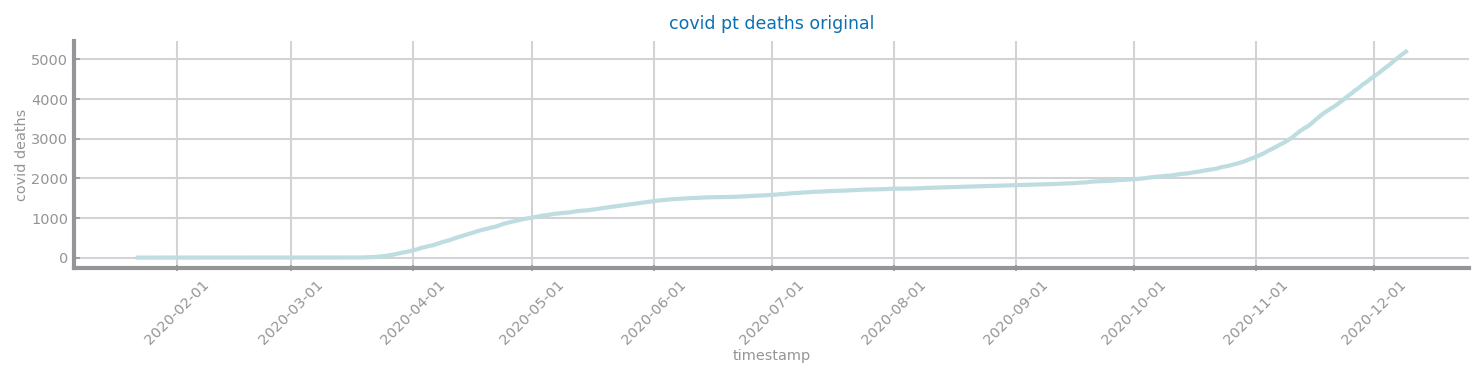

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts

data = pd.read_csv('covid19_pt.csv', index_col='Date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(data, x_label='timestamp', y_label='covid deaths', title='covid pt deaths original')
plt.xticks(rotation = 45)
plt.show()

# Smoothing

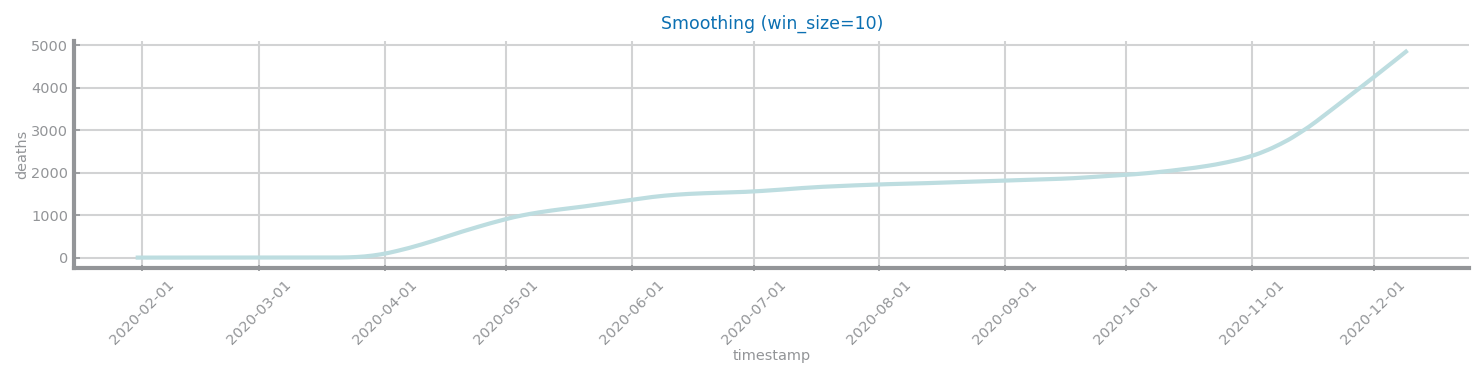

In [2]:
WIN_SIZE = 10
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

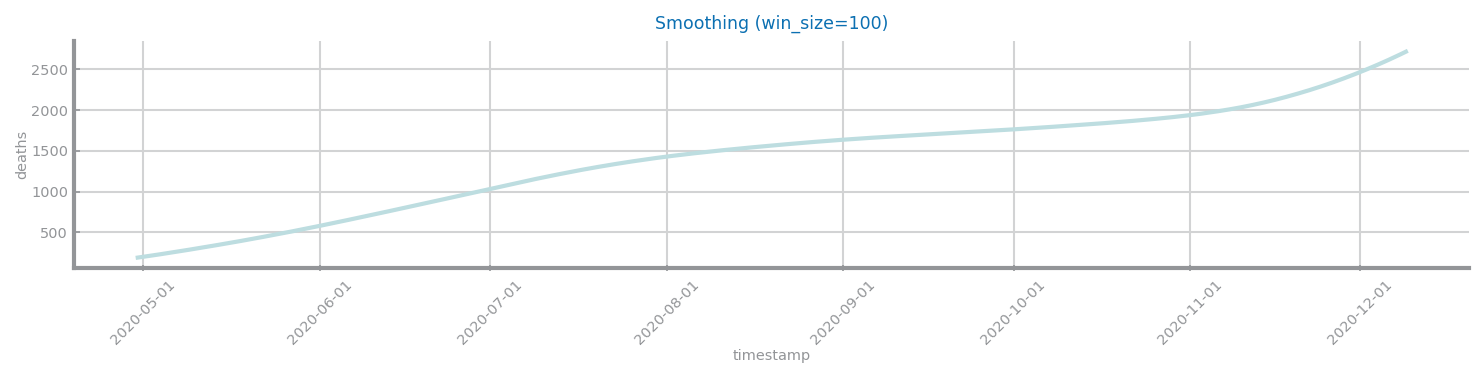

In [3]:
WIN_SIZE = 100
rolling = data.rolling(window=WIN_SIZE)
smooth_df = rolling.mean()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(smooth_df, title=f'Smoothing (win_size={WIN_SIZE})', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

# Aggregation

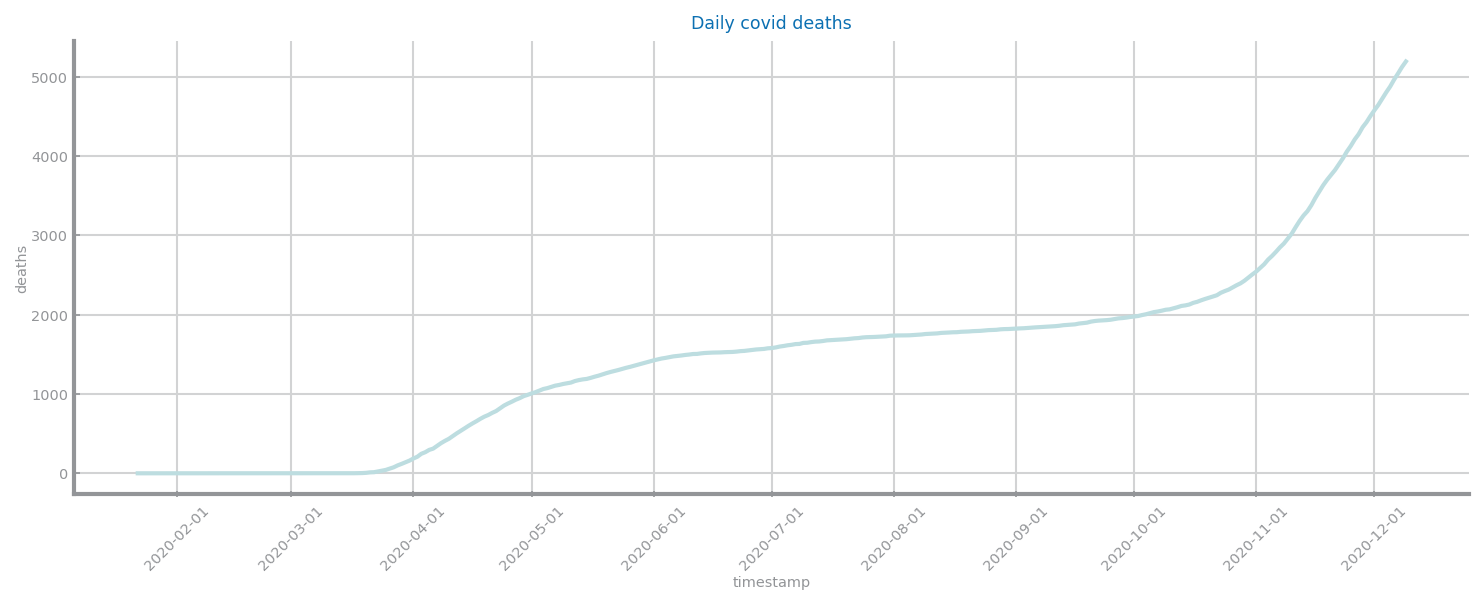

In [4]:
def aggregate_by(data: pd.Series, index_var: str, period: str, title: str = '', x_label: str = '', y_label: str = ''):
    index = data.index.to_period(period)
    agg_df = data.copy().groupby(index).mean()
    agg_df[index_var] = index.drop_duplicates().to_timestamp()
    agg_df.set_index(index_var, drop=True, inplace=True)
    ts.plot_series(agg_df, title=title, x_label=x_label, y_label=y_label)

plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'timestamp', 'D', title='Daily covid deaths', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

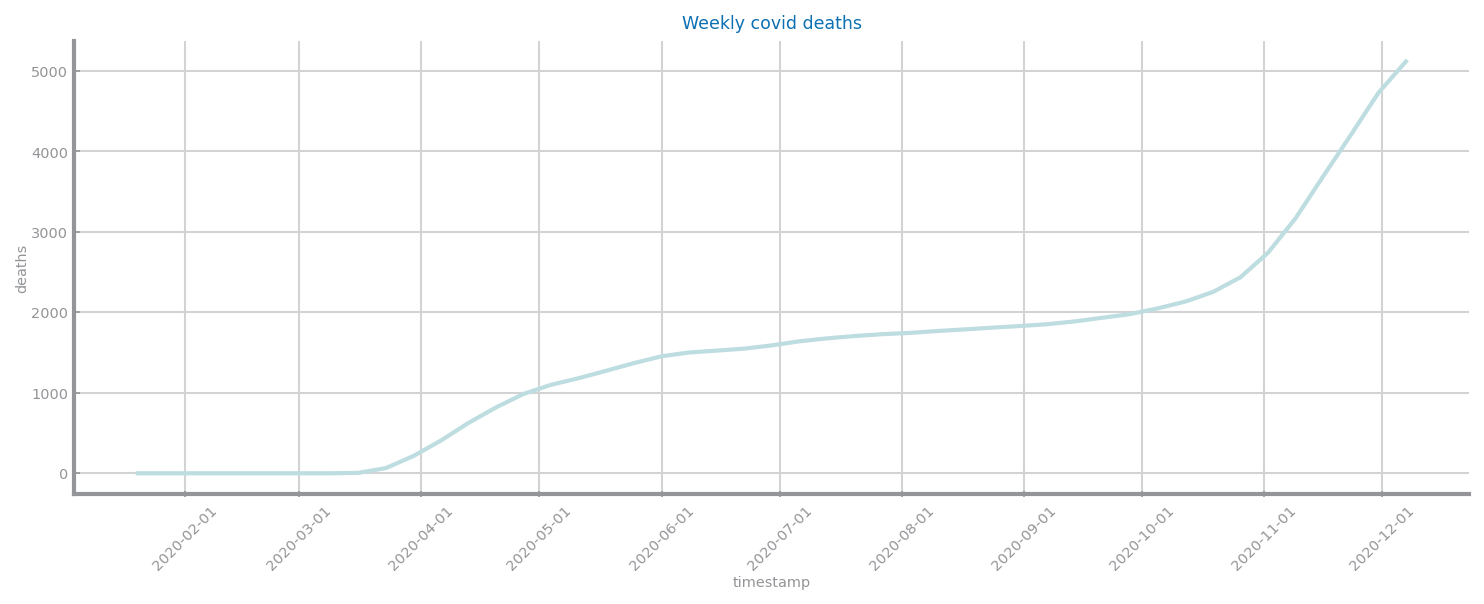

In [5]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'timestamp', 'W', title='Weekly covid deaths', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

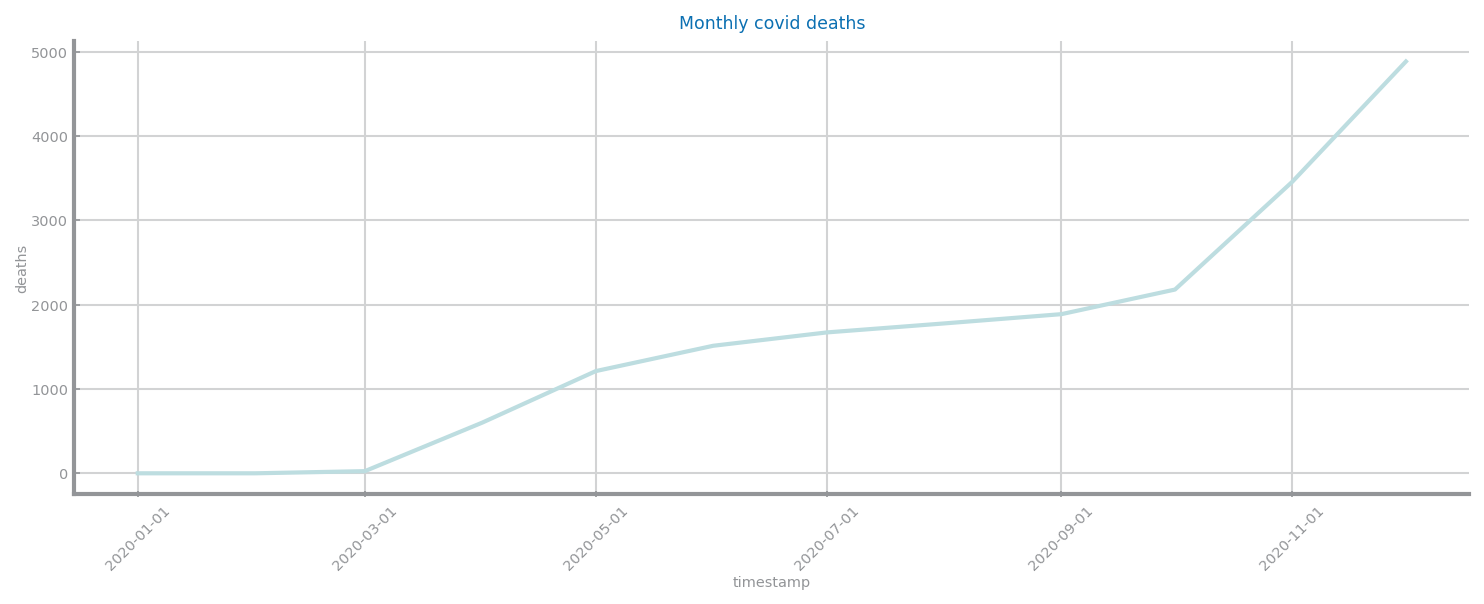

In [6]:
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
aggregate_by(data, 'timestamp', 'M', title='Monthly covid deaths', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()

# Differentiation

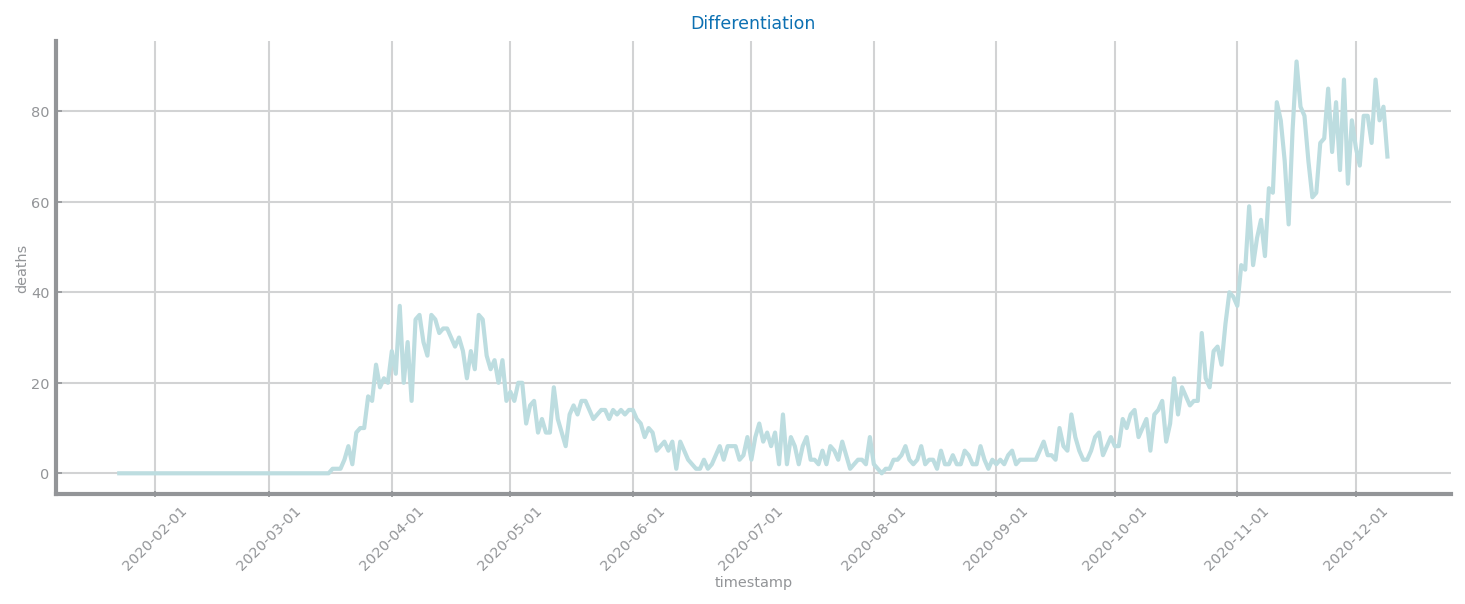

In [7]:
diff_df = data.diff()
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT))
ts.plot_series(diff_df, title='Differentiation', x_label='timestamp', y_label='deaths')
plt.xticks(rotation = 45)
plt.show()